In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./Dataset/User0_credit_card_transactions.csv")
data.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,6:21,$134.09,Swipe Transaction,3.527210e+18,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,6:42,$38.48,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,6:22,$120.34,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3.414530e+18,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,6:23,$104.71,Swipe Transaction,5.817220e+18,La Verne,CA,91750.0,5912,NaN,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7.146670e+18,Monterey Park,CA,91755.0,5970,NaN,No
6,0,0,2002,9,4,5:51,$93.84,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
7,0,0,2002,9,4,6:09,$123.50,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
8,0,0,2002,9,5,6:14,$61.72,Swipe Transaction,-7.276120e+17,Monterey Park,CA,91754.0,5411,NaN,No
9,0,0,2002,9,5,9:35,$57.10,Swipe Transaction,4.055260e+18,La Verne,CA,91750.0,7538,NaN,No


In [3]:
data.shape

(19963, 15)

In [4]:
data.drop_duplicates(inplace=True)
data.shape

(19963, 15)

In [5]:
data.dropna
data.shape

(19963, 15)

In [6]:
data= data.drop(['Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'Is Fraud?'], axis=1, inplace=False)

In [7]:
data.reset_index(drop=True)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,MCC,Errors?
0,0,0,2002,9,1,6:21,$134.09,Swipe Transaction,5300,NaN
1,0,0,2002,9,1,6:42,$38.48,Swipe Transaction,5411,NaN
2,0,0,2002,9,2,6:22,$120.34,Swipe Transaction,5411,NaN
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,5651,NaN
4,0,0,2002,9,3,6:23,$104.71,Swipe Transaction,5912,NaN
...,...,...,...,...,...,...,...,...,...,...
19958,0,4,2009,2,12,13:03,$9.71,Swipe Transaction,5411,Technical Glitch
19959,0,4,2009,2,22,11:58,$27.94,Swipe Transaction,5211,NaN
19960,0,4,2009,2,24,16:53,$13.97,Swipe Transaction,5912,NaN
19961,0,4,2009,3,29,16:30,$14.27,Swipe Transaction,5411,NaN


In [8]:
data['Amount'] = data['Amount'].str[1:]

In [9]:
data.dtypes

User         int64
Card         int64
Year         int64
Month        int64
Day          int64
Time        object
Amount      object
Use Chip    object
MCC          int64
Errors?     object
dtype: object

In [10]:
data.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,MCC,Errors?
0,0,0,2002,9,1,6:21,134.09,Swipe Transaction,5300,NaN
1,0,0,2002,9,1,6:42,38.48,Swipe Transaction,5411,NaN
2,0,0,2002,9,2,6:22,120.34,Swipe Transaction,5411,NaN
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,5651,NaN
4,0,0,2002,9,3,6:23,104.71,Swipe Transaction,5912,NaN
5,0,0,2002,9,3,13:53,86.19,Swipe Transaction,5970,NaN
6,0,0,2002,9,4,5:51,93.84,Swipe Transaction,5411,NaN
7,0,0,2002,9,4,6:09,123.50,Swipe Transaction,5411,NaN
8,0,0,2002,9,5,6:14,61.72,Swipe Transaction,5411,NaN
9,0,0,2002,9,5,9:35,57.10,Swipe Transaction,7538,NaN


In [11]:
columns_to_convert_STR = ["Use Chip", "Errors?"]

data["Amount"]=pd.to_numeric(data["Amount"], errors="coerce")

for column in columns_to_convert_STR:
    data[column] = data[column].astype("string")

datetime_list = []

for index, row in data.iterrows():
  year, month, day = row['Year'], row['Month'], row['Day']
  time = row['Time']
  datetime_list.append(pd.to_datetime(f"{year}-{month:02d}-{day:02d} {time}", format='%Y-%m-%d %H:%M'))

data['DateTime'] = datetime_list

data.drop(columns=['Year', 'Month', 'Day', 'Time'], inplace=True)
data.head(10)

data.dtypes

User                 int64
Card                 int64
Amount             float64
Use Chip    string[python]
MCC                  int64
Errors?     string[python]
DateTime    datetime64[ns]
dtype: object

In [12]:
data['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15840
Chip Transaction       2808
Online Transaction     1315
Name: count, dtype: Int64

In [13]:
replacements = {'Swipe Transaction': 'on-site', 'Chip Transaction ': 'on-site', 'Online Transaction':'online'}
data['Use Chip'] = data['Use Chip'].replace(replacements)
new={'Use Chip': 'Payment Method'}
data = data.rename(columns=new)
data.head(10)


,User,Card,Amount,Payment Method,MCC,Errors?,DateTime
0,0,0,134.09,on-site,5300,<NA>,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,<NA>,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,<NA>,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,<NA>,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,<NA>,2002-09-03 06:23:00
5,0,0,86.19,on-site,5970,<NA>,2002-09-03 13:53:00
6,0,0,93.84,on-site,5411,<NA>,2002-09-04 05:51:00
7,0,0,123.50,on-site,5411,<NA>,2002-09-04 06:09:00
8,0,0,61.72,on-site,5411,<NA>,2002-09-05 06:14:00
9,0,0,57.10,on-site,7538,<NA>,2002-09-05 09:35:00


In [14]:
data['MCC'].value_counts()

MCC
5411    3748
5912    3376
5300    1934
5541    1693
5311    1175
        ... 
5816       1
4411       1
7549       1
5947       1
3009       1
Name: count, Length: 94, dtype: int64

In [15]:
data['Errors?'].value_counts()

Errors?
Insufficient Balance            469
Technical Glitch                 46
Bad PIN                          42
Bad Expiration                    9
Bad Card Number                   4
Bad CVV                           2
Bad PIN,Insufficient Balance      1
Bad PIN,Technical Glitch          1
Name: count, dtype: Int64

In [16]:
data.shape

(19963, 7)

In [17]:
data = data[data['Errors?'].isna()]
data.shape


(19389, 7)

In [18]:
data.head

<bound method NDFrame.head of        User  Card  Amount Payment Method   MCC Errors?            DateTime
0         0     0  134.09        on-site  5300    <NA> 2002-09-01 06:21:00
1         0     0   38.48        on-site  5411    <NA> 2002-09-01 06:42:00
2         0     0  120.34        on-site  5411    <NA> 2002-09-02 06:22:00
3         0     0  128.95        on-site  5651    <NA> 2002-09-02 17:45:00
4         0     0  104.71        on-site  5912    <NA> 2002-09-03 06:23:00
...     ...   ...     ...            ...   ...     ...                 ...
19957     0     4   22.70        on-site  5300    <NA> 2009-02-07 16:16:00
19959     0     4   27.94        on-site  5211    <NA> 2009-02-22 11:58:00
19960     0     4   13.97        on-site  5912    <NA> 2009-02-24 16:53:00
19961     0     4   14.27        on-site  5411    <NA> 2009-03-29 16:30:00
19962     0     4   13.55        on-site  5812    <NA> 2009-03-31 13:17:00

[19389 rows x 7 columns]>

In [19]:
data['Errors?'].value_counts()

Series([], Name: count, dtype: Int64)

In [20]:
data.reset_index(drop=True)

,User,Card,Amount,Payment Method,MCC,Errors?,DateTime
0,0,0,134.09,on-site,5300,<NA>,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,<NA>,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,<NA>,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,<NA>,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,<NA>,2002-09-03 06:23:00
...,...,...,...,...,...,...,...
19384,0,4,22.70,on-site,5300,<NA>,2009-02-07 16:16:00
19385,0,4,27.94,on-site,5211,<NA>,2009-02-22 11:58:00
19386,0,4,13.97,on-site,5912,<NA>,2009-02-24 16:53:00
19387,0,4,14.27,on-site,5411,<NA>,2009-03-29 16:30:00


In [21]:
data= data.drop(['Errors?'], axis=1, inplace=False)

In [22]:
data.head(10)

,User,Card,Amount,Payment Method,MCC,DateTime
0,0,0,134.09,on-site,5300,2002-09-01 06:21:00
1,0,0,38.48,on-site,5411,2002-09-01 06:42:00
2,0,0,120.34,on-site,5411,2002-09-02 06:22:00
3,0,0,128.95,on-site,5651,2002-09-02 17:45:00
4,0,0,104.71,on-site,5912,2002-09-03 06:23:00
5,0,0,86.19,on-site,5970,2002-09-03 13:53:00
6,0,0,93.84,on-site,5411,2002-09-04 05:51:00
7,0,0,123.50,on-site,5411,2002-09-04 06:09:00
8,0,0,61.72,on-site,5411,2002-09-05 06:14:00
9,0,0,57.10,on-site,7538,2002-09-05 09:35:00


In [23]:
unique_values = data['MCC'].unique()
number_of_unique_values = len(unique_values)

print("Number of unique values:", number_of_unique_values)

Number of unique values: 94


In [24]:
# Create a pandas Series from the array
data_series = pd.Series(unique_values)

# Create a DataFrame from the Series with a desired column name (optional)
mcc_df = pd.DataFrame(data_series, columns=['MCC'])


In [25]:
mcc_data = pd.read_csv('./dataset/mcc_codes.csv')

In [26]:
mcc_data = mcc_data.drop(["irs_reportable", "usda_description", "combined_description"], axis=1, inplace=False)
mcc_data = mcc_data.rename(columns={'mcc': 'MCC', "irs_description":"IRSDescription", "edited_description":"EditedDescription"})
mcc_data.head(10)

,MCC,EditedDescription,IRSDescription
0,742,Veterinary Services,Veterinary Services
1,763,Agricultural Co-operatives,Agricultural Cooperative
2,780,"Horticultural Services, Landscaping Services",Landscaping Services
3,1520,General Contractors-Residential and Commercial,General Contractors
4,1711,Air Conditioning Contractors – Sales and Insta...,"Heating, Plumbing, A/C"
5,1731,Electrical Contractors,Electrical Contractors
6,1740,"Insulation – Contractors, Masonry, Stonework C...","Masonry, Stonework, and Plaster"
7,1750,Carpentry Contractors,Carpentry Contractors
8,1761,"Roofing – Contractors, Sheet Metal Work – Cont...","Roofing/Siding, Sheet Metal"
9,1771,Contractors – Concrete Work,Concrete Work Contractors


In [31]:
unique_mcc_df = pd.merge(mcc_df, mcc_data, on='MCC', how='left')
unique_mcc_df.to_csv("./dataset/unique_mcc_descriptions.csv", index=False)

In [28]:
df_merged = pd.merge(data, mcc_data, on='MCC', how='left')

In [29]:
df_merged.head(20)

,User,Card,Amount,Payment Method,MCC,DateTime,EditedDescription,IRSDescription
0,0,0,134.09,on-site,5300,2002-09-01 06:21:00,Wholesale Clubs,Wholesale Clubs
1,0,0,38.48,on-site,5411,2002-09-01 06:42:00,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets"
2,0,0,120.34,on-site,5411,2002-09-02 06:22:00,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets"
3,0,0,128.95,on-site,5651,2002-09-02 17:45:00,Family Clothing Stores,Family Clothing Stores
4,0,0,104.71,on-site,5912,2002-09-03 06:23:00,Drug Stores and Pharmacies,Drug Stores and Pharmacies
5,0,0,86.19,on-site,5970,2002-09-03 13:53:00,Artist’s Supply and Craft Shops,Artist’s Supply and Craft Shops
6,0,0,93.84,on-site,5411,2002-09-04 05:51:00,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets"
7,0,0,123.50,on-site,5411,2002-09-04 06:09:00,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets"
8,0,0,61.72,on-site,5411,2002-09-05 06:14:00,"Grocery Stores, Supermarkets","Grocery Stores, Supermarkets"
9,0,0,57.10,on-site,7538,2002-09-05 09:35:00,Automotive Service Shops,Auto Service Shops


C:\Users\NourH\AppData\Local\Temp\ipykernel_7524\3667652550.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


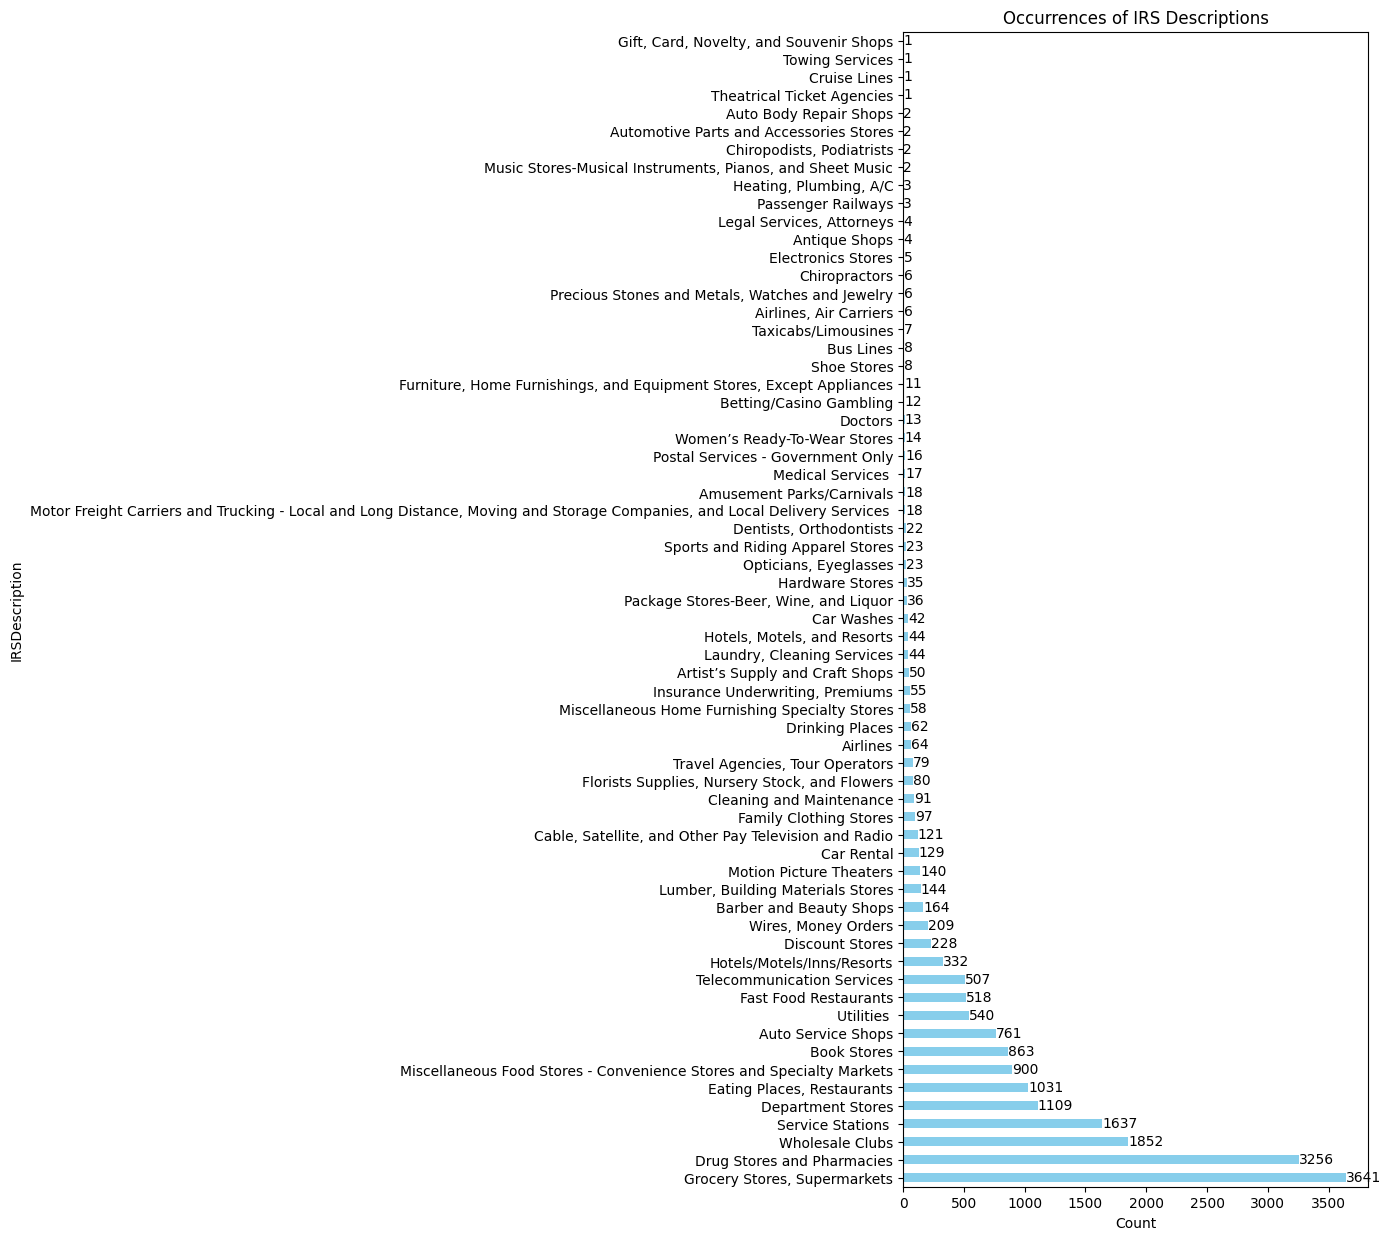

In [30]:
import matplotlib.pyplot as plt

value_counts = df_merged['IRSDescription'].value_counts()

plt.figure(figsize=(6, 15))  # Swap width and height for horizontal bars
bars = value_counts.plot(kind='barh', color='skyblue')  # 'h' for horizontal bars

# Add count labels at the end of each bar
for idx, value in enumerate(value_counts):
  plt.text(value + 0.1, idx, str(value), va='center')  # Adjust offset as needed

plt.xlabel('Count')
plt.ylabel('IRSDescription')  # Swap labels to match orientation
plt.title('Occurrences of IRS Descriptions')
plt.yticks(rotation=0)  # Rotate y-axis labels for readability (optional)
plt.tight_layout()
plt.show()